# **Electric Field of a Point Charge**

According to **Coulomb's Law**, the electric field $\vec{E}$ generated by a point charge $q_f$ is expressed as:


$$\vec{E} = K \frac{q_f}{r^2} \hat{r}$$


Where:
- $\hat{r} = \frac{\vec{r}}{|\vec{r}|}$ is the unit vector indicating the direction of the field.
- $K = \frac{1}{4 \pi \varepsilon_0}$ is Coulomb's constant in vacuum.

Expanding this expression, the electric field can be written explicitly as:

$$
\vec{E} = \frac{1}{4 \pi \varepsilon_0} \frac{q_f}{r^2} \hat{r}
$$

### Dielectric Constant and Its Effect on the Electric Field

When a dielectric material is introduced, the electric field inside the material is reduced relative to the electric field in a vacuum. The dielectric constant, denoted as $\varepsilon_r$, is defined by the relationship:

$$
\varepsilon_r = \frac{E_0}{E}
$$

Where:
- $E_0$ is the electric field in a vacuum.
- $E$ is the electric field in the presence of the dielectric.

### Electric Field in a Dielectric Medium

The modified electric field in the dielectric medium can be expressed as:

$$
E = \frac{E_0}{\varepsilon_r}
$$

By substituting this into Coulomb's Law, the electric field becomes:

$$
\vec{E} = \left( \frac{1}{4 \pi \varepsilon_0} \frac{q_f}{r^2} \right) \frac{1}{\varepsilon_r}
$$

Simplifying further:

$$
\vec{E} = \frac{1}{4 \pi \varepsilon_0 \varepsilon_r} \frac{q_f}{r^2} \hat{r} \\
$$

Where $\varepsilon = \varepsilon_0 \varepsilon_r$ represents the permittivity of the dielectric medium.


## Defining a function to calculate the electric field of a point charge

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

In [ ]:
# Constant
EPSILON_0 = 8.85e-12  # Permittivity of free space

In [ ]:
def electric_field(q_f, epsilon, x, y, z, t, r=None):
    """
    Calculate the electric field vector at a point due to a charge q_f.

    Parameters:
        q_f: float - Charge magnitude (Coulombs)
        epsilon: float - Relative permittivity
        x, y, z: float - Coordinates of the point
        t: float - Time parameter for variation
        r: float, optional - Fixed radius (distance from charge)

    Returns:
        np.array - Electric field vector [Ex, Ey, Ez]
    """
    r_vector = np.array([x, y, z])
    r_norma = np.linalg.norm(r_vector)

    if r is not None:
        # Normalize the vector to match the specified radius
        r_vector = r * r_vector / r_norma
        r_norma = r

    if r_norma == 0:
        return np.zeros(3)

    K = 1 / (4 * np.pi * EPSILON_0 * epsilon)
    E_magnitud = K * q_f / r_norma**2
    E_vector = E_magnitud * r_vector / r_norma

    return E_vector * np.sin(t)  # Time-dependent variation



### Defining a function to visualize the electric field movement

In [ ]:
def update_anim(num, ax, x, y, z, q_f, epsilon, r):
    """
    Update the animation frame with the electric field vectors.

    Parameters:
        num: int - Current frame number
        ax: matplotlib.axes - 3D axis to plot on
        x, y, z: np.array - Grid points
        q_f: float - Charge magnitude
        epsilon: float - Relative permittivity
        r: float - Radius of the point charge
    """
    ax.cla()  # Clear axis
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Electric Field of a Point Charge")

    # Time parameter
    t = num / 10

    # Calculate and plot electric field
    for i in range(len(x)):
        for j in range(len(y)):
            for k in range(len(z)):
                E = electric_field(q_f, epsilon, x[i], y[j], z[k], t, r)
                ax.quiver(x[i], y[j], z[k], E[0], E[1], E[2], color="red", length=0.1)

### 3D Visualization of the electric field of a point charge in a vaccum

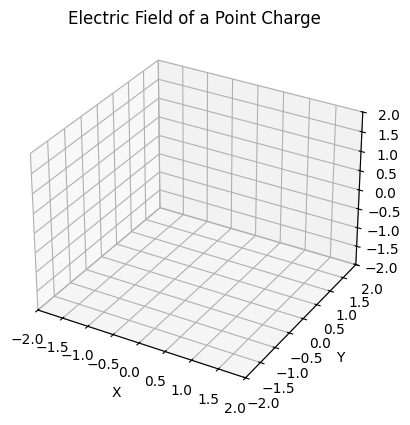

In [ ]:
# Parameters
radius = 1
charge = 1e-9
epsilon = 1

# Grid
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(-2, 2, 10)

# Create visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Animation
animation = FuncAnimation(
    fig,
    update_anim,
    frames=np.arange(0, 20, 1),
    interval=100,
    repeat=True,
    fargs=(ax, x, y, z, charge, epsilon, radius)
)

# Render animation in notebook
rc('animation', html='jshtml')
animation

### Visualization of the electric field of a point charge in different dielectric mediums

### Examples of dielectric constants

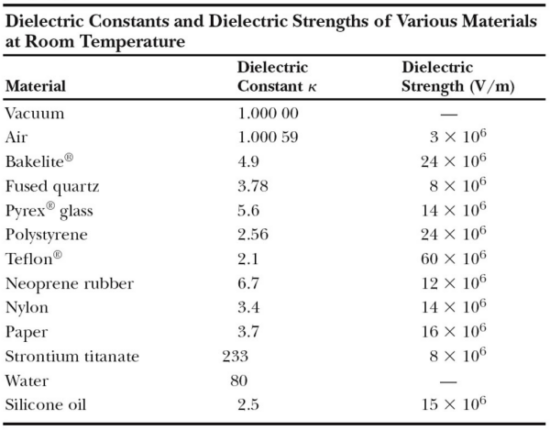